# **Milestone 3 - Fingerprint Matching**

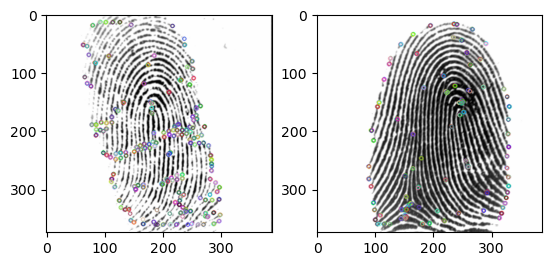

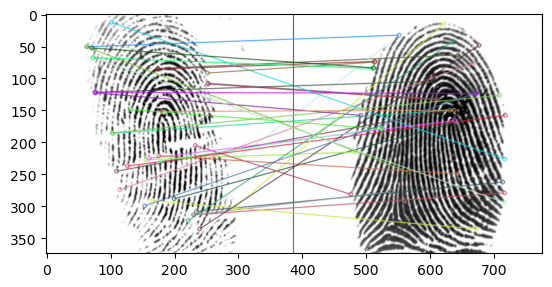

Fingerprint does not match.


In [14]:
import cv2
import os
import sys
import numpy
import fingerprint_enhancer
import matplotlib.pyplot as plt
# from enhance import image_enhance
from skimage.morphology import skeletonize, thin

# os.chdir("/app/")

def removedot(invertThin):
    temp0 = numpy.array(invertThin[:])
    temp0 = numpy.array(temp0)
    temp1 = temp0/255
    temp2 = numpy.array(temp1)
    temp3 = numpy.array(temp2)

    enhanced_img = numpy.array(temp0)
    filter0 = numpy.zeros((10,10))
    W,H = temp0.shape[:2]
    filtersize = 6

    for i in range(W - filtersize):
        for j in range(H - filtersize):
            filter0 = temp1[i:i + filtersize,j:j + filtersize]

            flag = 0
            if sum(filter0[:,0]) == 0:
                flag +=1
            if sum(filter0[:,filtersize - 1]) == 0:
                flag +=1
            if sum(filter0[0,:]) == 0:
                flag +=1
            if sum(filter0[filtersize - 1,:]) == 0:
                flag +=1
            if flag > 3:
                temp2[i:i + filtersize, j:j + filtersize] = numpy.zeros((filtersize, filtersize))

    return temp2


def get_descriptors(img):
	clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
	img = clahe.apply(img)
	# img = image_enhance.image_enhance(img)
	img = fingerprint_enhancer.enhance_Fingerprint(img)
	img = numpy.array(img, dtype=numpy.uint8)
	# Threshold
	ret, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
	# Normalize to 0 and 1 range
	img[img == 255] = 1

	#Thinning
	skeleton = skeletonize(img)
	skeleton = numpy.array(skeleton, dtype=numpy.uint8)
	skeleton = removedot(skeleton)
	# Harris corners
	harris_corners = cv2.cornerHarris(img, 3, 3, 0.04)
	harris_normalized = cv2.normalize(harris_corners, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC1)
	threshold_harris = 125
	# Extract keypoints
	keypoints = []
	for x in range(0, harris_normalized.shape[0]):
		for y in range(0, harris_normalized.shape[1]):
			if harris_normalized[x][y] > threshold_harris:
				keypoints.append(cv2.KeyPoint(y, x, 1))
	# Define descriptor
	orb = cv2.ORB_create()
	# Compute descriptors
	_, des = orb.compute(img, keypoints)
	return (keypoints, des);

def isMatching(image_name1,image_name2):
	img1 = cv2.imread("datasets/DB1_B/" + image_name1, cv2.IMREAD_GRAYSCALE)
	kp1, des1 = get_descriptors(img1)

	img2 = cv2.imread("datasets/DB1_B/" + image_name2, cv2.IMREAD_GRAYSCALE)
	kp2, des2 = get_descriptors(img2)

	# Matching between descriptors
	bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
	matches = sorted(bf.match(des1, des2), key= lambda match:match.distance)
	# # Plot keypoints
	img4 = cv2.drawKeypoints(img1, kp1, outImage=None)
	img5 = cv2.drawKeypoints(img2, kp2, outImage=None)
	f, axarr = plt.subplots(1,2)
	axarr[0].imshow(img4)
	axarr[1].imshow(img5)
	plt.show()
	# Plot matches
	img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches, flags=2, outImg=None)
	plt.imshow(img3)
	plt.show()

	# Calculate score
	score = 0;
	for match in matches:
		score += match.distance
	score_threshold = 20
	if score/len(matches) < score_threshold:
		# print("Fingerprint matches.")
		return True
	else:
		return False
		# print("Fingerprint does not match.")

def main():
	image_name1 = '105_4.tif'
	

	image_name2 = '103_1.tif'
	if isMatching(image_name1,image_name2):
		print("Fingerprint matches.")
	else:
		print("Fingerprint does not match.")


if __name__ == "__main__":
	try:
		main()
	except:
		raise


In [14]:
def draw_minutiae(fingerprint, minutiae, termination_color = (255,0,0), bifurcation_color = (0,0,255)):
    
    # res = cv.cvtColor(fingerprint, cv.COLOR_GRAY2BGR)
    res=fingerprint
    for x, y, t, *d in minutiae:
        color = termination_color if t else bifurcation_color
        if len(d)==0:
            z=x
            # cv.drawMarker(res, (x,y), color, cv.MARKER_SQUARE, 5)
        # else:
        #     cv.drawMarker(res, (x,y), color, cv.MARKER_CROSS, 1)
        else:
            if t:
                 cv.circle(res, (x,y), 5, color, 2)
            else:
                cv.drawMarker(res, (x,y), color, cv.MARKER_SQUARE, 15)

            
               
            # cv.rectangle(res, (x,y), color, 3, cv.LINE_AA)
            # cv.line(res, (x,y), (x+ox,y-oy), color, 3, cv.LINE_AA)
                
    return res

Load the Datasets

34
47
37
32
52
18
44
53
39
56
37
36
103
47
40
27
25
73
56
33
70
72
76
54
31


IndexError: index 0 is out of bounds for axis 0 with size 0

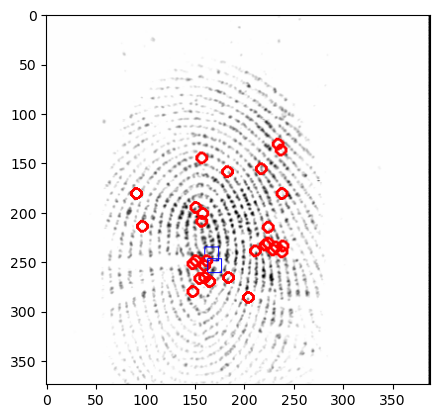

In [15]:
import glob
import cv2 as cv
import matplotlib.pyplot as plt
from minutiae_extractor import extract_minutiae
# fig = plt.figure(figsize=(10,10))
# rows = 5
# columns = 1
# count=1
for img_file in glob.glob('datasets/DB1_B/*.tif'):
  img0=cv.imread(img_file)
  # img1=skeletonize(binarize(enhancer(img0)))
  # fig.add_subplot(rows, columns, count)
  # count+=1
  # mask = filter_mask(img0)
  # # minutiae_pts_arr = minutiae_points(img1)
  # minutiae_pts_arr = minutiae_generator(img1)
  # filtered_minutiae = list(filter(lambda m: mask[m[1], m[0]]>20, minutiae_pts_arr))
  minutiae_angle = extract_minutiae(img_file)
  d=draw_minutiae(img0, minutiae_angle)
  print(len(minutiae_angle))
  plt.imshow(d)
  

Utkarsh desmukh code for extracting minutiae points

In [ ]:
import cv2
import numpy as np
import skimage.morphology
from skimage.morphology import convex_hull_image, erosion
from skimage.morphology import square
import matplotlib.pyplot as plt
import math
import copy
class MinutiaeFeature(object):
    def __init__(self, locX, locY, Orientation, Type):
        self.locX = locX
        self.locY = locY
        self.Orientation = Orientation
        self.Type = Type

class FingerprintFeatureExtractor(object):
    def __init__(self):
        self._mask = []
        self._skel = []
        self.minutiaeTerm = []
        self.minutiaeBif = []

    def __skeletonize(self, img):
        img = np.uint8(img > 128)
        self._skel = skimage.morphology.skeletonize(img)
        self._skel = np.uint8(self._skel) * 255
        self._mask = img * 255

    def __computeAngle(self, block, minutiaeType):
        angle = []
        (blkRows, blkCols) = np.shape(block)
        CenterX, CenterY = (blkRows - 1) / 2, (blkCols - 1) / 2
        if (minutiaeType.lower() == 'termination'):
            sumVal = 0
            for i in range(blkRows):
                for j in range(blkCols):
                    if ((i == 0 or i == blkRows - 1 or j == 0 or j == blkCols - 1) and block[i][j] != 0):
                        angle.append(-math.degrees(math.atan2(i - CenterY, j - CenterX)))
                        sumVal += 1
                        if (sumVal > 1):
                            angle.append(float('nan'))
            return (angle)

        elif (minutiaeType.lower() == 'bifurcation'):
            (blkRows, blkCols) = np.shape(block)
            CenterX, CenterY = (blkRows - 1) / 2, (blkCols - 1) / 2
            angle = []
            sumVal = 0
            for i in range(blkRows):
                for j in range(blkCols):
                    if ((i == 0 or i == blkRows - 1 or j == 0 or j == blkCols - 1) and block[i][j] != 0):
                        angle.append(-math.degrees(math.atan2(i - CenterY, j - CenterX)))
                        sumVal += 1
            if (sumVal != 3):
                angle.append(float('nan'))
            return (angle)

    def __getTerminationBifurcation(self):
        self._skel = self._skel == 255
        (rows, cols) = self._skel.shape
        self.minutiaeTerm = np.zeros(self._skel.shape)
        self.minutiaeBif = np.zeros(self._skel.shape)

        for i in range(1, rows - 1):
            for j in range(1, cols - 1):
                if (self._skel[i][j] == 1):
                    block = self._skel[i - 1:i + 2, j - 1:j + 2]
                    block_val = np.sum(block)
                    if (block_val == 2):
                        self.minutiaeTerm[i, j] = 1
                    elif (block_val == 4):
                        self.minutiaeBif[i, j] = 1

        self._mask = convex_hull_image(self._mask > 0)
        self._mask = erosion(self._mask, square(5))  # Structuing element for mask erosion = square(5)
        self.minutiaeTerm = np.uint8(self._mask) * self.minutiaeTerm

    def __removeSpuriousMinutiae(self, minutiaeList, img, thresh):
        img = img * 0
        SpuriousMin = []
        numPoints = len(minutiaeList)
        D = np.zeros((numPoints, numPoints))
        for i in range(1,numPoints):
            for j in range(0, i):
                (X1,Y1) = minutiaeList[i]['centroid']
                (X2,Y2) = minutiaeList[j]['centroid']

                dist = np.sqrt((X2-X1)**2 + (Y2-Y1)**2)
                D[i][j] = dist
                if(dist < thresh):
                    SpuriousMin.append(i)
                    SpuriousMin.append(j)

        SpuriousMin = np.unique(SpuriousMin)
        for i in range(0,numPoints):
            if(not i in SpuriousMin):
                (X,Y) = np.int16(minutiaeList[i]['centroid'])
                img[X,Y] = 1

        img = np.uint8(img)
        return(img)

    def __cleanMinutiae(self, img):
        self.minutiaeTerm = skimage.measure.label(self.minutiaeTerm, connectivity=2)
        RP = skimage.measure.regionprops(self.minutiaeTerm)
        self.minutiaeTerm = self.__removeSpuriousMinutiae(RP, np.uint8(img), 10)

    def __performFeatureExtraction(self):
        FeaturesTerm = []
        self.minutiaeTerm = skimage.measure.label(self.minutiaeTerm, connectivity=2)
        RP = skimage.measure.regionprops(np.uint8(self.minutiaeTerm))

        WindowSize = 2  # --> For Termination, the block size must can be 3x3, or 5x5. Hence the window selected is 1 or 2
        FeaturesTerm = []
        for num, i in enumerate(RP):
            (row, col) = np.int16(np.round(i['Centroid']))
            block = self._skel[row - WindowSize:row + WindowSize + 1, col - WindowSize:col + WindowSize + 1]
            angle = self.__computeAngle(block, 'Termination')
            if(len(angle) == 1):
                FeaturesTerm.append(MinutiaeFeature(row, col, angle, 'Termination'))

        FeaturesBif = []
        self.minutiaeBif = skimage.measure.label(self.minutiaeBif, connectivity=2)
        RP = skimage.measure.regionprops(np.uint8(self.minutiaeBif))
        WindowSize = 1  # --> For Bifurcation, the block size must be 3x3. Hence the window selected is 1
        for i in RP:
            (row, col) = np.int16(np.round(i['Centroid']))
            block = self._skel[row - WindowSize:row + WindowSize + 1, col - WindowSize:col + WindowSize + 1]
            angle = self.__computeAngle(block, 'Bifurcation')
            if(len(angle) == 3):
                FeaturesBif.append(MinutiaeFeature(row, col, angle, 'Bifurcation'))
        return (FeaturesTerm, FeaturesBif)

    def extractMinutiaeFeatures(self, img):
        self.__skeletonize(img)

        self.__getTerminationBifurcation()

        self.__cleanMinutiae(img)

        FeaturesTerm, FeaturesBif = self.__performFeatureExtraction()
        return(FeaturesTerm, FeaturesBif)

    def showResults(self, FeaturesTerm, FeaturesBif):
        
        (rows, cols) = self._skel.shape
        DispImg = np.zeros((rows, cols, 3), np.uint8)
        DispImg[:, :, 0] = 255*self._skel
        DispImg[:, :, 1] = 255*self._skel
        DispImg[:, :, 2] = 255*self._skel

        for idx, curr_minutiae in enumerate(FeaturesTerm):
            row, col = curr_minutiae.locX, curr_minutiae.locY
            (rr, cc) = skimage.draw.circle_perimeter(row, col, 3)
            skimage.draw.set_color(DispImg, (rr, cc), (0, 0, 255))

        for idx, curr_minutiae in enumerate(FeaturesBif):
            row, col = curr_minutiae.locX, curr_minutiae.locY
            (rr, cc) = skimage.draw.circle_perimeter(row, col, 3)
            skimage.draw.set_color(DispImg, (rr, cc), (255, 0, 0))
        
        return DispImg


def extract_minutiae_features(img, showResult=False):
    feature_extractor = FingerprintFeatureExtractor()
    FeaturesTerm, FeaturesBif = feature_extractor.extractMinutiaeFeatures(img)

    if(showResult):
        return (feature_extractor.showResults(FeaturesTerm, FeaturesBif),FeaturesTerm,FeaturesBif)

    return(FeaturesTerm, FeaturesBif)

In [ ]:
import glob
fig = plt.figure(figsize=(30,30))
rows = 5
columns = 1
count=1
for img_file in glob.glob('*.tif'):
  img1=cv.imread(img_file,cv.IMREAD_GRAYSCALE)
  img1=enhancer(img1)
  fig.add_subplot(rows, columns, count)
  count+=1
  # FeaturesTerminations, FeaturesBifurcations = extract_minutiae_features(img1, showResult=True)
  # minu = []
  # for i in FeaturesTerminations+FeaturesBifurcations:
  #   minu.append((i.locX,i.locY,i.Orientation,i.Type=='Termination'))
  # mask = filter_mask(img1)
  # d=draw_minutiae(img1, minu)
  # print(len(minu))
  d, FeaturesTerminations, FeaturesBifurcations =extract_minutiae_features(img1, showResult=True)
  print(len(FeaturesTerminations)+len(FeaturesBifurcations))
  plt.imshow(d)

In [ ]:
T = [[i[0],i[1],i[3]] for i in minutiae_angle]  # x,y,theta of valid minutiae points
print(T)

In [ ]:
from pathlib import Path
from PIL import Image
import numpy as np

 #https://becominghuman.ai/understanding-and-coding-inception-module-in-keras-eb56e9056b4b
# get the path/directory
folder_dir = '/content/drive/MyDrive/DB1_A'
 
# iterate over files in
# that directory
images = Path(folder_dir).glob('*.bmp')

img_data_list=[]
Y=dict()
for image in images:
    img=Image.open(image)
    data=np.asarray(img)
    #data=np.dstack([img,img,img])
    img_data_list.append(data)
   # try:
    #  Y[(int(image.name.split('_')[0]))].append(data)
  #  except:
   #   Y[(int(image.name.split('_')[0]))]=[data]
img_data=(img_data_list)
img_data
